In [5]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [12]:
data = pd.read_csv("C:\\Users\\USER\\Documents\\Jupyter\\all my projects\\marketing_campaign.csv", sep="\\t")


In [13]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
0     False       False      False           False   False    False     False   
1     False       False      False           False   False    False     False   
2     False       False      False           False   False    False     False   
3     False       False      False           False   False    False     False   
4     False       False      False           False   False    False     False   
...     ...         ...        ...             ...     ...      ...       ...   
2235  False       False      False           False   False    False     False   
2236  False       False      False           False   False    False     False   
2237  False       False      False           False   False    False     False   
2238  False       False      False           False   False    False     False   
2239  False       False      False           Fa

In [14]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

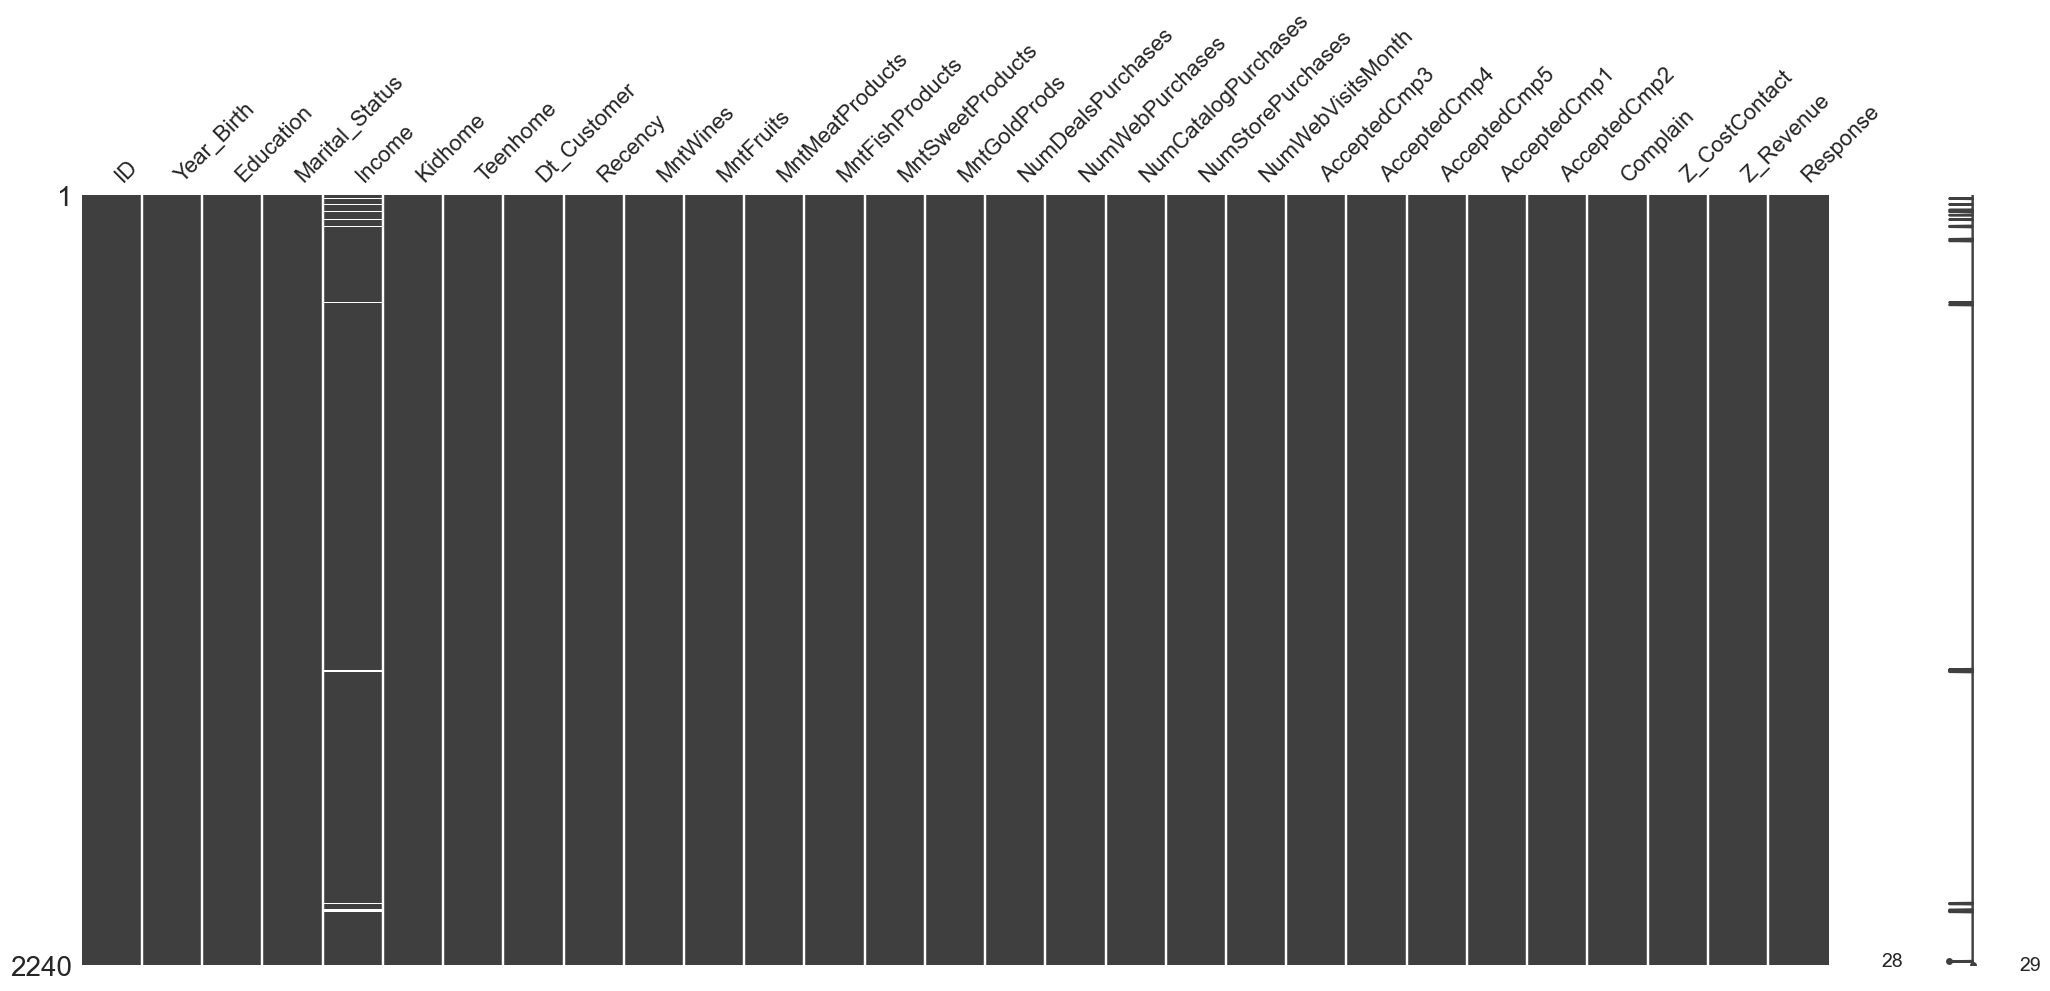

In [15]:

msno.matrix(data);

In [16]:
data=data.dropna()

In [17]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [22]:
data['Age'] = 2015 - data['Year_Birth']

In [23]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [24]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [25]:
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

In [26]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [27]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

In [28]:
data.head(3)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduate  58138.0        0         0       58       635         88   
1  Graduate  46344.0        1         1       38        11          1   
2  Graduate  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  Spent  Children  Is_Parent  
0             0         0         1   58   1617         0          0  
1             0         0         0   61     27         2          1  
2             0         0         0   50    776         0          0

In [32]:
data.shape

(2216, 27)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [34]:
data.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2216.000000        2216.000000      2216.000000          2216.000000   
mean      43.965253           2.323556         4.085289             2.671029   
std       51.815414           1.923716         2.740951             2.926734   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.500000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      321.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

               Age        Spent     Children    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  
mean     46.179603   607.075361     0.947202     0.714350  
std      11.985554   602.900476     0.749062     0.451825  
min      19.000000     5.000000     0.000000     0.000000  
25%      38.000000    69.000000     0.000000     0.000000  
50%      45.000000   396.500000     1.000000     1.000000  
75%      56.000000  1048.000000     1.000000     1.000000  
max     122.000000  2525.000000     3.000000     1.000000

In [35]:
data.describe(include=object).T

count unique       top  freq
Education  2216      3  Graduate  1116

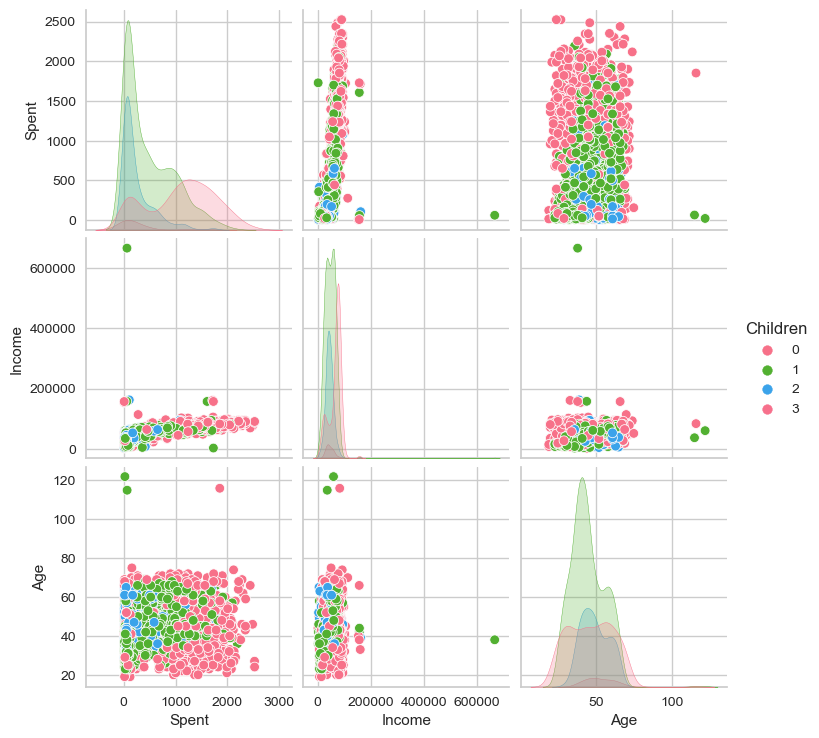

In [36]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

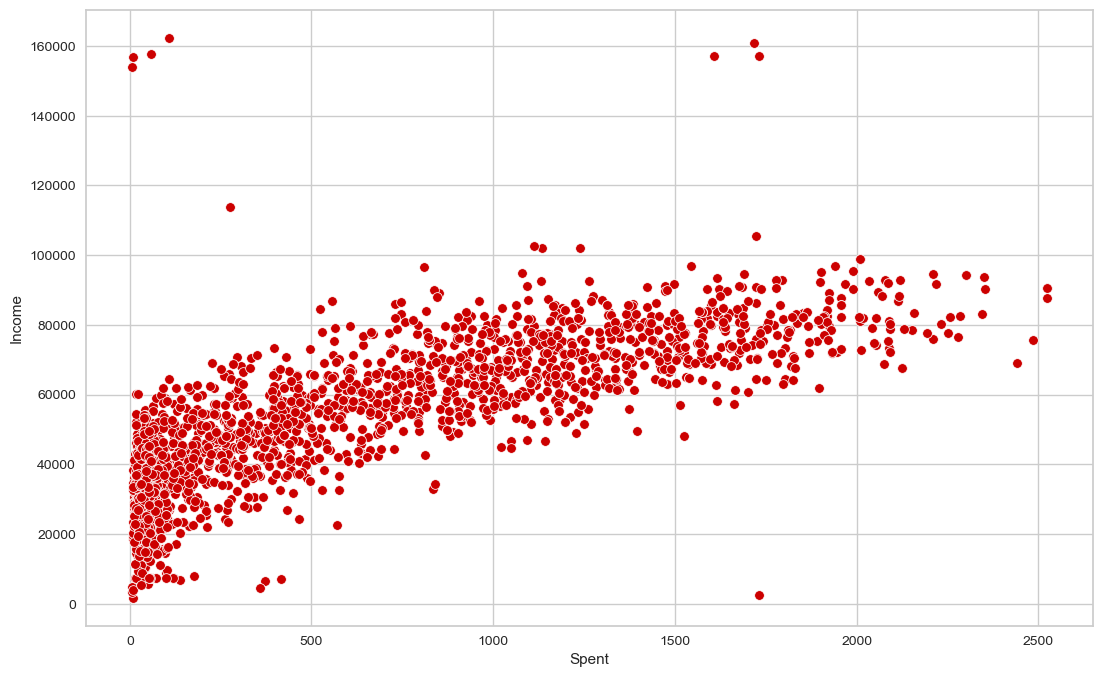

In [40]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');

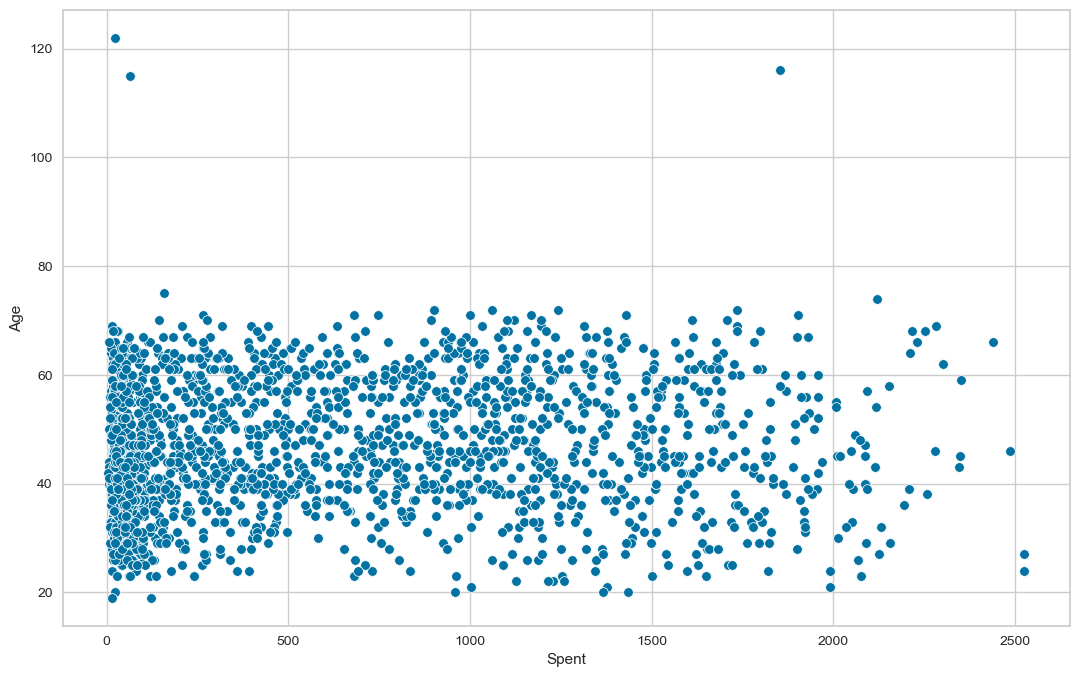

In [41]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);

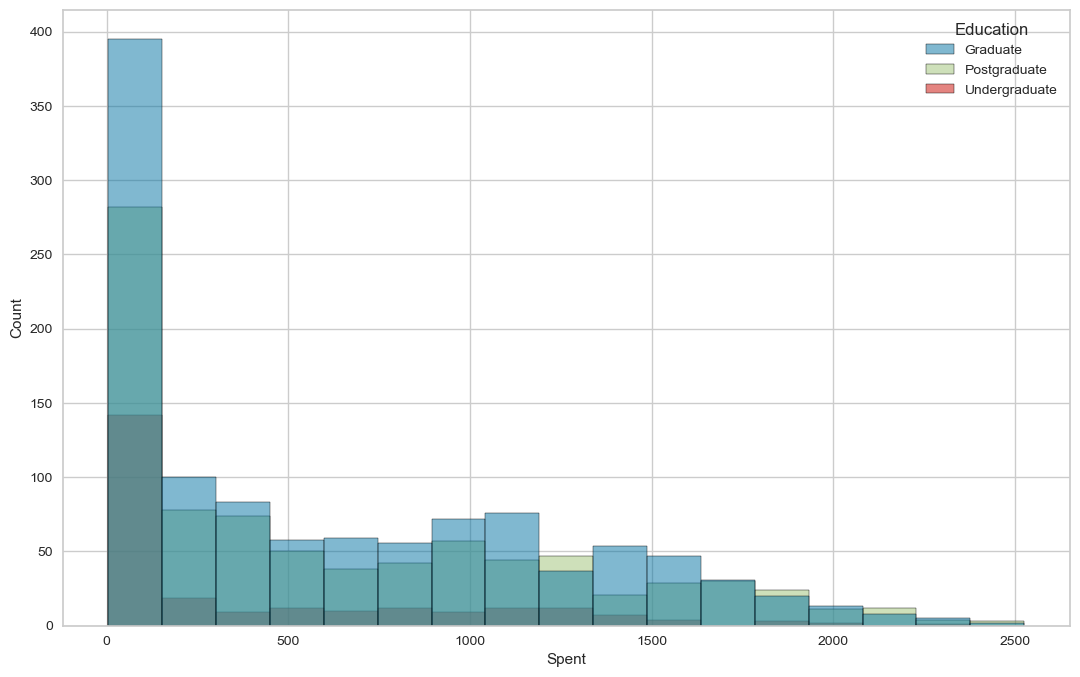

In [42]:
plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);

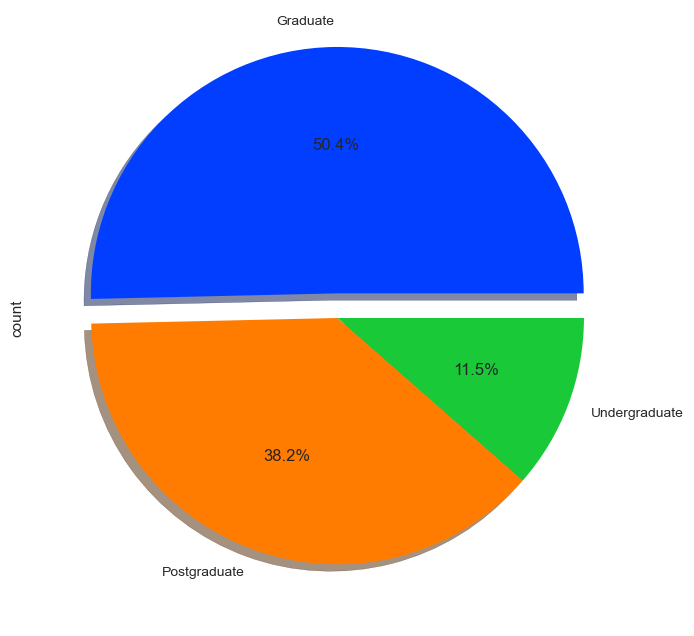

In [43]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));
     

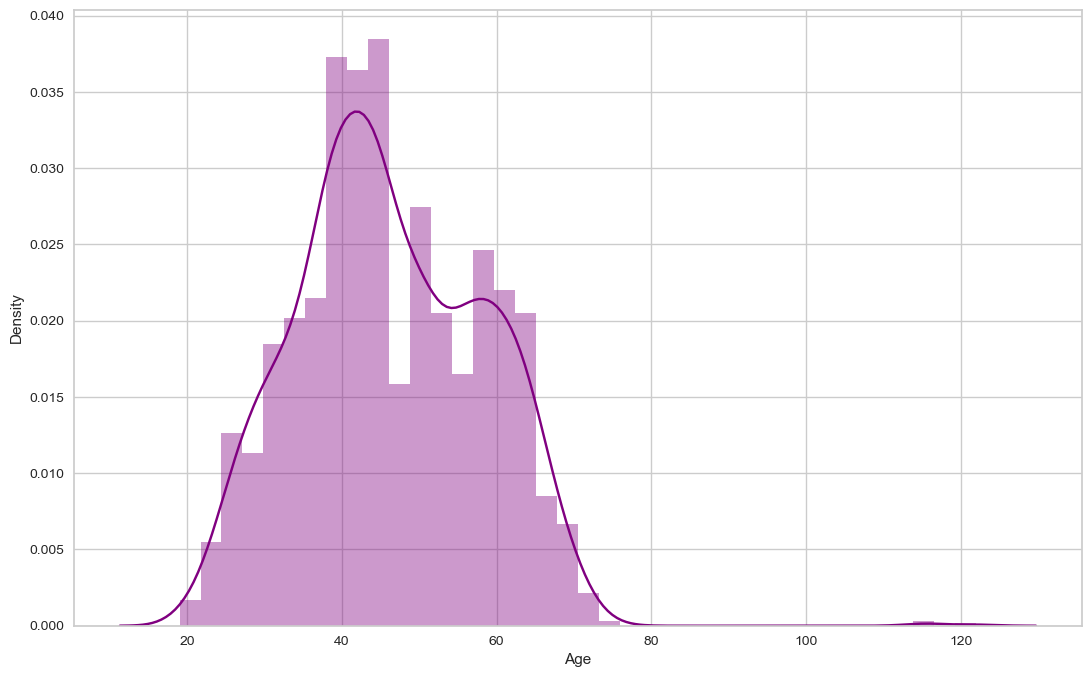

In [44]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='purple');

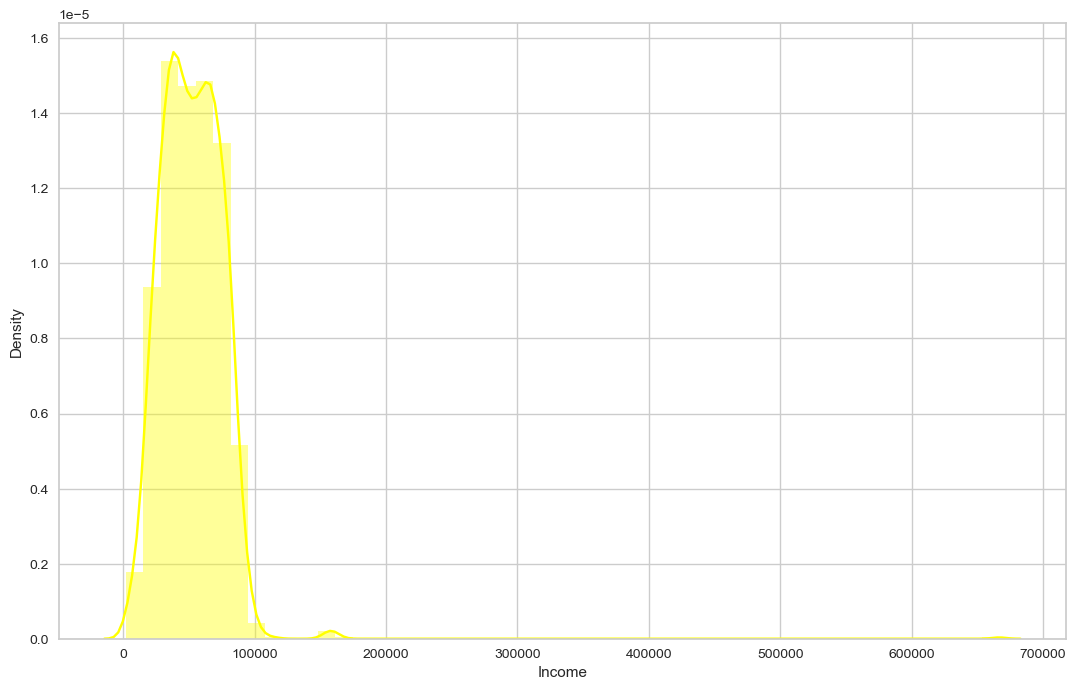

In [45]:

plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='Yellow');

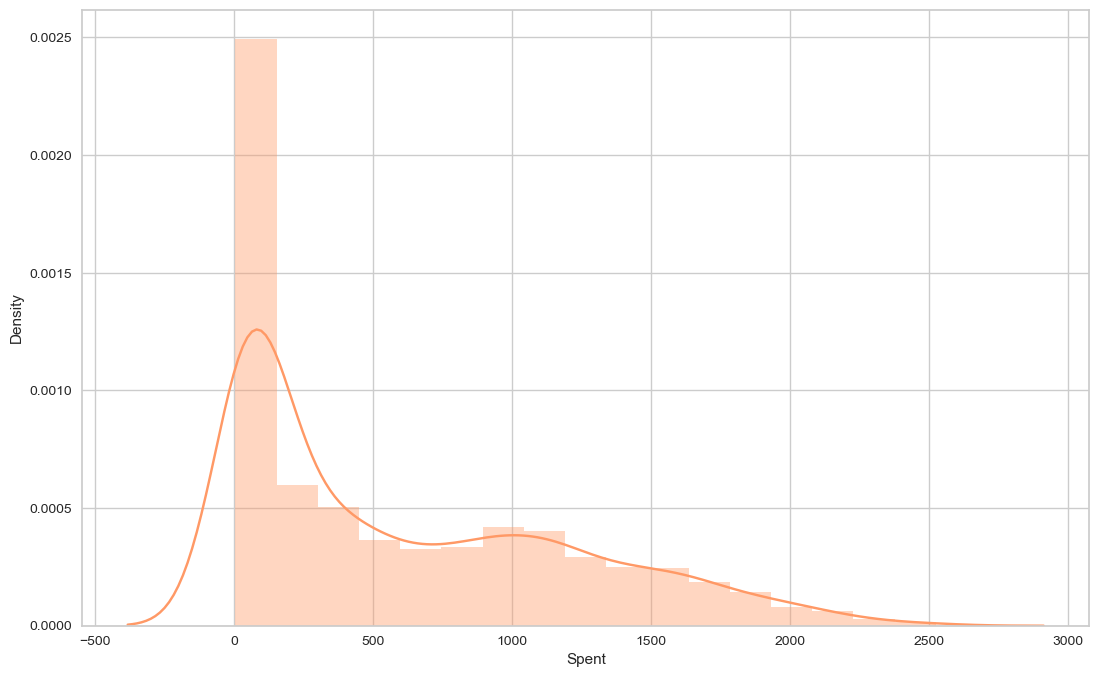

In [46]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='#ff9966');

In [47]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=data['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()

In [48]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [50]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

In [51]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



In [52]:
data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [53]:
data.shape
     

(2212, 27)

In [54]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [55]:
# check the number of different labels
for var in categorical:
    print(data[var].value_counts() / np.float(len(data)))
    print()
    print()

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [56]:
categorical

['Education']

In [57]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [58]:
data.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Spent                    int64
Children                 int64
Is_Parent                int32
dtype: object

In [59]:
data.head(3)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          1  58138.0        0         0       58       635         88   
1          1  46344.0        1         1       38        11          1   
2          1  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  Spent  Children  Is_Parent  
0             0         0         1   58   1617         0          0  
1             0         0         0   61     27         2          1  
2             0         0         0   50    776         0          0

<Axes: >

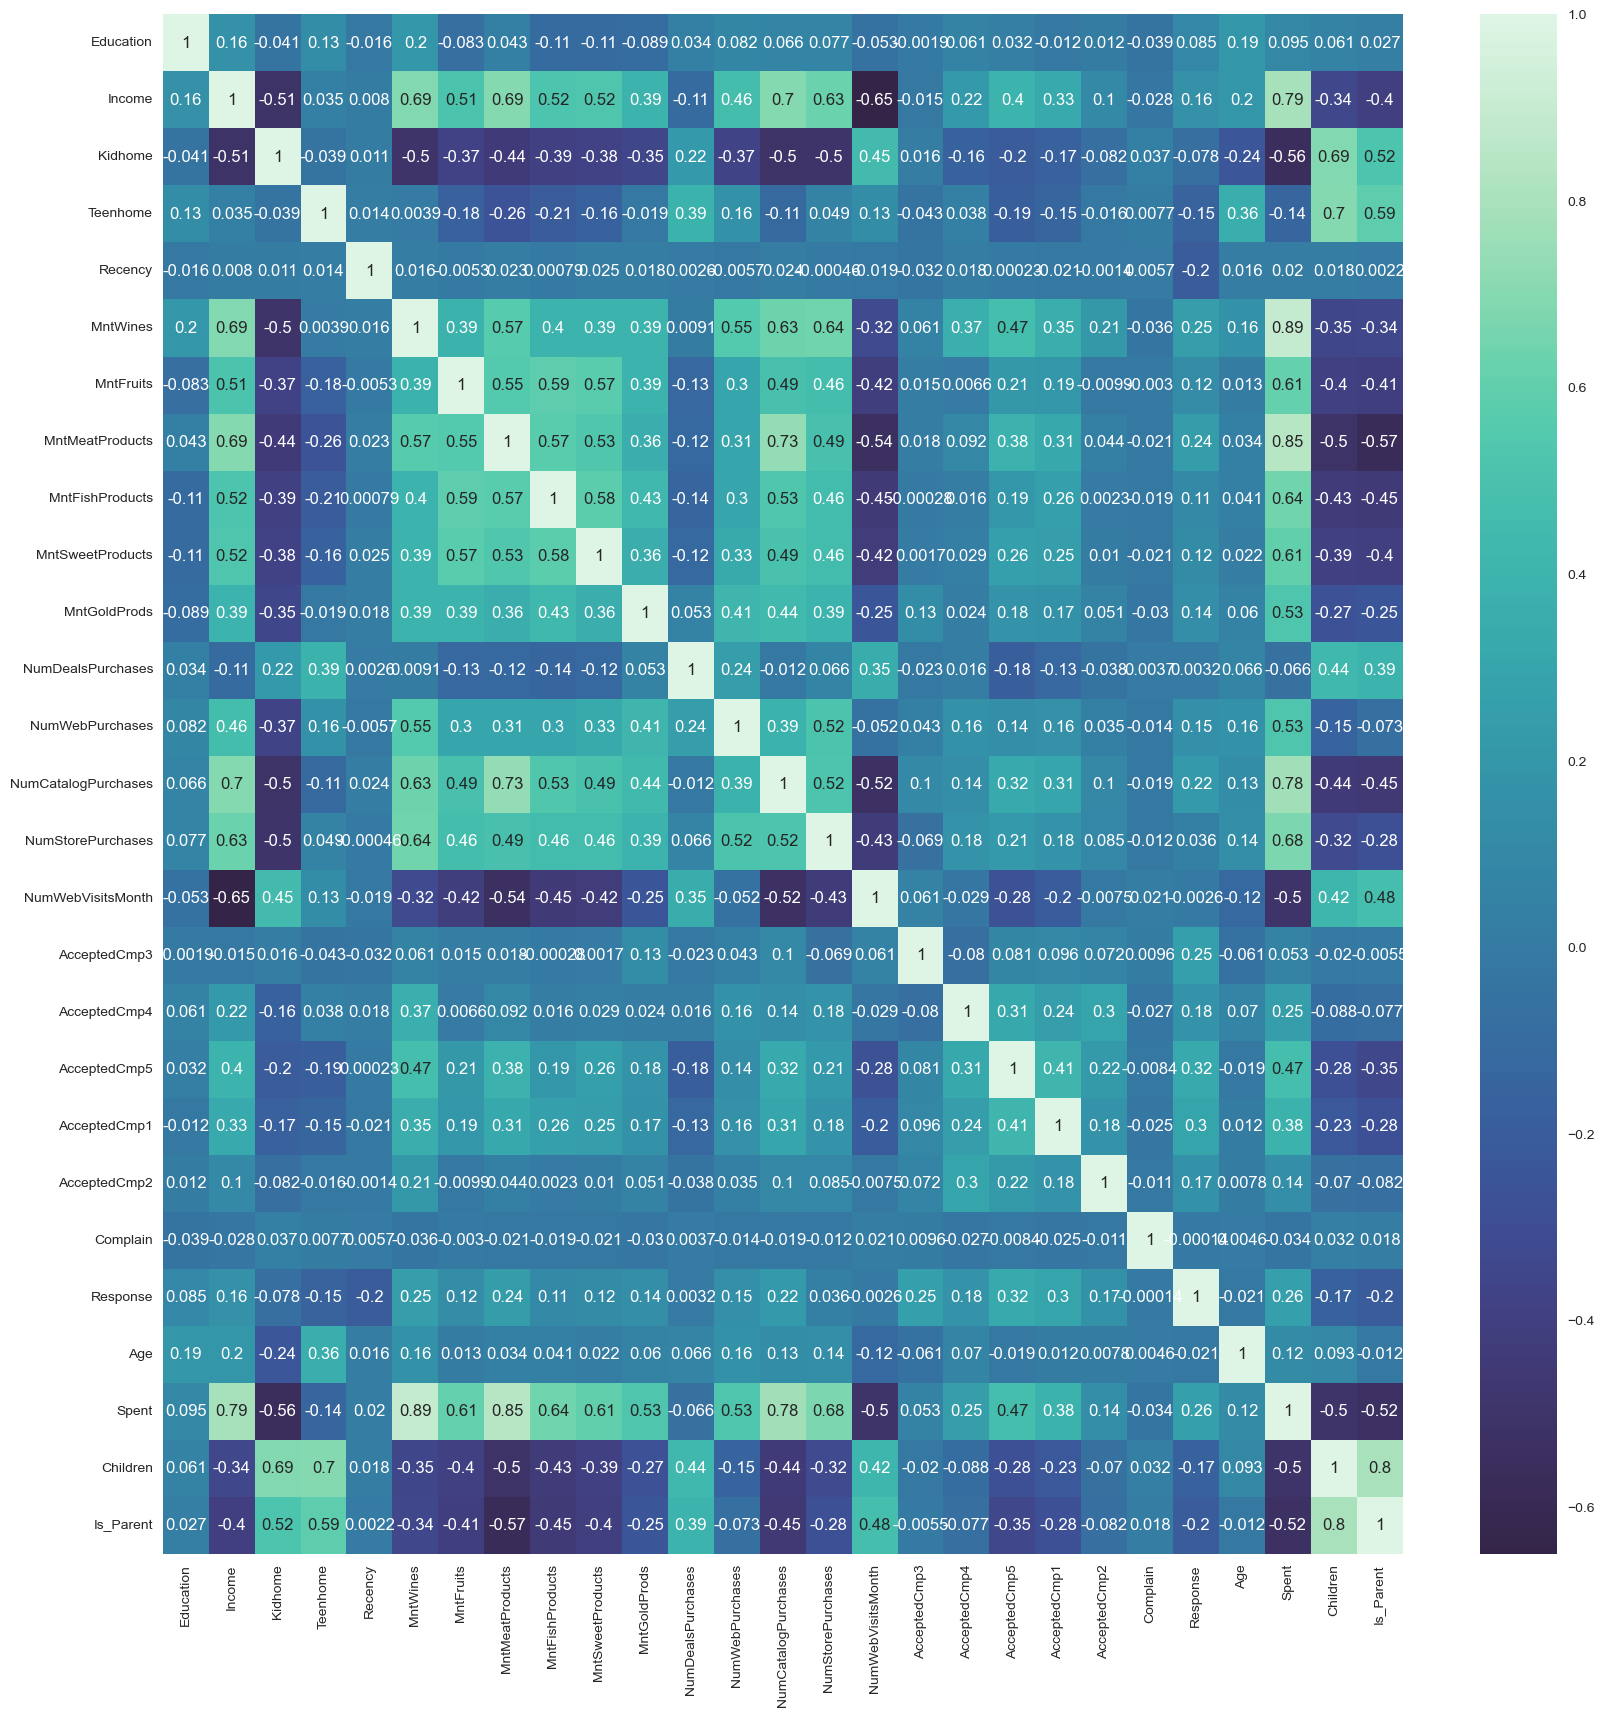

In [60]:
corrmat = data.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

In [61]:
data_old = data.copy()

In [62]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

In [63]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
     

In [64]:

data.head(3)

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.411675  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.411675 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.411675  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.690293         2.453472          1.483713      0.852576   
1        -0.718230        -0.651004         -0.634019     -0.733642   
2        -0.178542         1.339513         -0.147184     -0.037254   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.351030         1.426865             2.503607          -0.555814   
1          -0.168701        -1.126420            -0.571340          -1.171160   
2          -0.688432         1.426865            -0.229679           1.290224   

   NumWebVisitsMonth       Age     Spent  Children  Is_Parent  
0           0.692181  1.018352  1.676245 -1.264598  -1.581139  
1          -0.132545  1.274785 -0.963297  1.404572   0.632456  
2          -0.544908  0.334530  0.280110 -1.264598  -1.581139

In [65]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [66]:

W = p.components_.T
W
     

array([[ 0.01484322,  0.16910495, -0.52296396],
       [ 0.29348451,  0.14547327, -0.13367468],
       [-0.2467653 , -0.00203925,  0.24701359],
       [-0.08326771,  0.50303141, -0.11373676],
       [ 0.00444768,  0.01378897,  0.02067276],
       [ 0.26783934,  0.20402567, -0.07352117],
       [ 0.24597846, -0.03573541,  0.22068868],
       [ 0.29378538, -0.03868737,  0.01865142],
       [ 0.25628725, -0.04985362,  0.21319665],
       [ 0.24526562, -0.02482774,  0.22237451],
       [ 0.19647757,  0.11272627,  0.27979959],
       [-0.06902899,  0.39547391,  0.3082873 ],
       [ 0.17935626,  0.32000484,  0.16938461],
       [ 0.2878316 ,  0.07450385, -0.00490546],
       [ 0.25361763,  0.19577691,  0.0244234 ],
       [-0.23191514,  0.10011417,  0.25074193],
       [ 0.04605014,  0.26457528, -0.43667414],
       [ 0.332411  ,  0.10091794,  0.03889664],
       [-0.23726305,  0.36383434,  0.09437866],
       [-0.23665682,  0.3339641 ,  0.13521833]])

In [67]:

pd.DataFrame(W, index=data.columns, columns=['W1','W2','W3'])

W1        W2        W3
Education            0.014843  0.169105 -0.522964
Income               0.293485  0.145473 -0.133675
Kidhome             -0.246765 -0.002039  0.247014
Teenhome            -0.083268  0.503031 -0.113737
Recency              0.004448  0.013789  0.020673
MntWines             0.267839  0.204026 -0.073521
MntFruits            0.245978 -0.035735  0.220689
MntMeatProducts      0.293785 -0.038687  0.018651
MntFishProducts      0.256287 -0.049854  0.213197
MntSweetProducts     0.245266 -0.024828  0.222375
MntGoldProds         0.196478  0.112726  0.279800
NumDealsPurchases   -0.069029  0.395474  0.308287
NumWebPurchases      0.179356  0.320005  0.169385
NumCatalogPurchases  0.287832  0.074504 -0.004905
NumStorePurchases    0.253618  0.195777  0.024423
NumWebVisitsMonth   -0.231915  0.100114  0.250742
Age                  0.046050  0.264575 -0.436674
Spent                0.332411  0.100918  0.038897
Children            -0.237263  0.363834  0.094379
Is_Parent           -0.236657  0.333964  0.135218

In [68]:
p.explained_variance_

array([7.91328654, 2.60609333, 1.39806514])

In [69]:
p.explained_variance_ratio_
     

array([0.39548546, 0.13024576, 0.06987166])

In [70]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

Explained Variability
1               0.395485
2               0.130246
3               0.069872

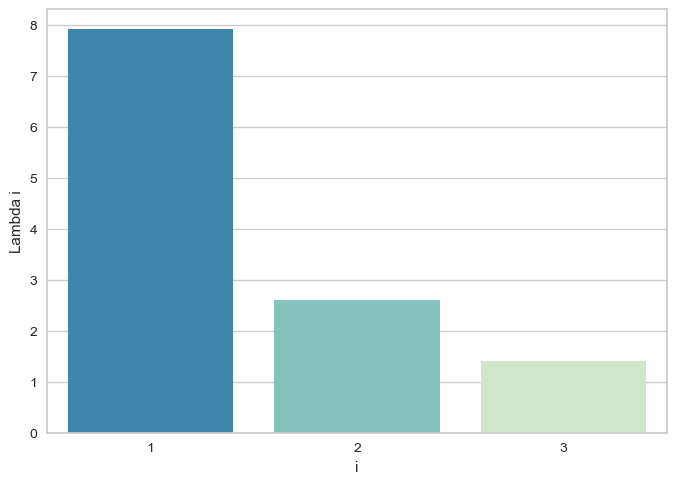

In [71]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [72]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3']))

In [73]:
data_PCA.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -5.139550e-17  2.813056 -5.617525 -2.572324 -0.814682  2.368172   
col2  2212.0  6.424437e-17  1.614340 -3.841635 -1.304466 -0.157929  1.204609   
col3  2212.0  4.175884e-17  1.182399 -4.245362 -0.825040 -0.011723  0.748447   

           max  
col1  7.517765  
col2  5.670664  
col3  5.420532

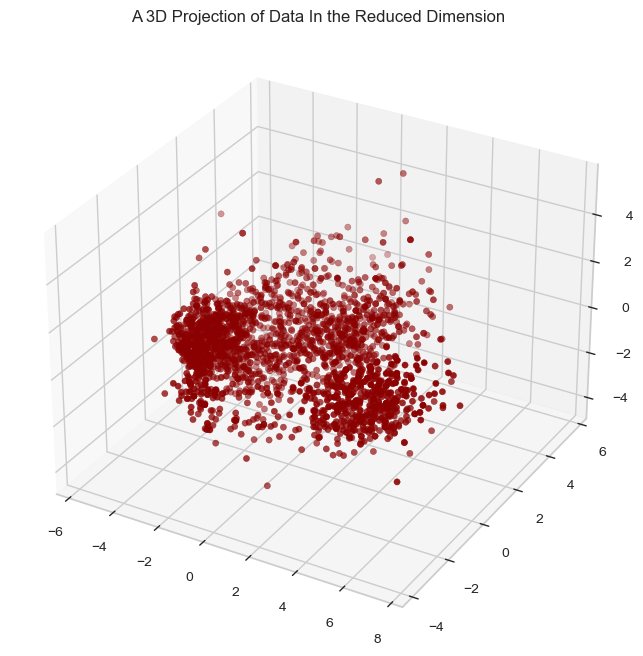

In [74]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

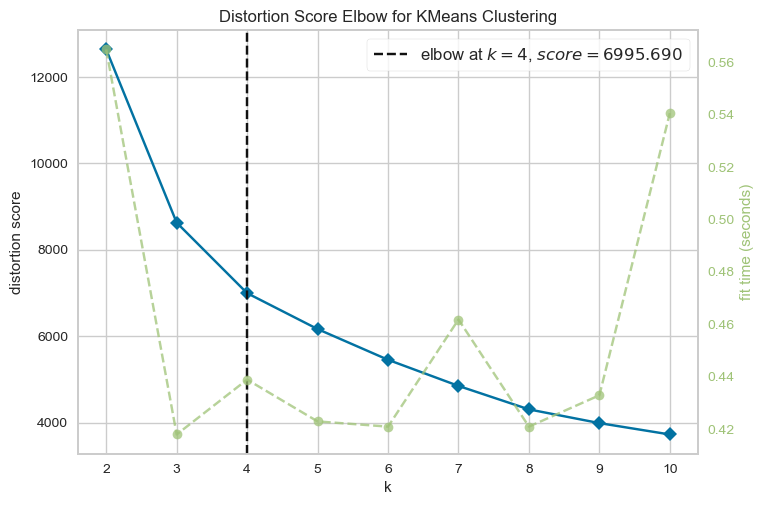

In [75]:

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_PCA)
Elbow_M.show();

In [76]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC

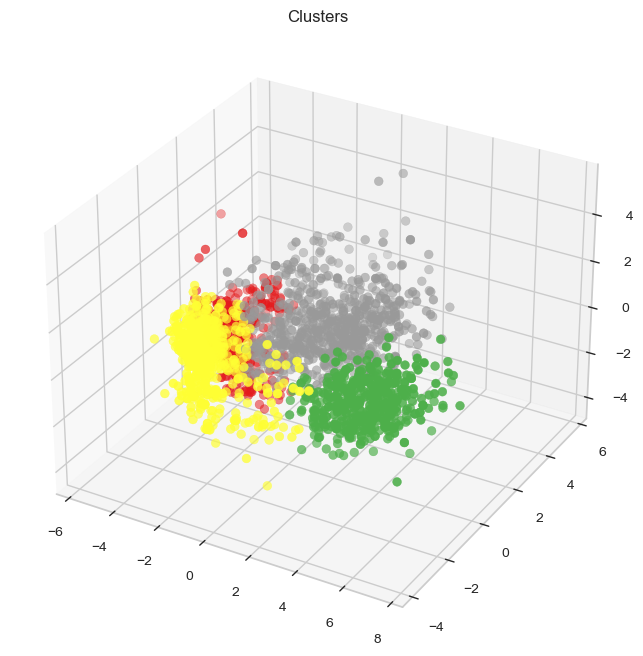

In [77]:

fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

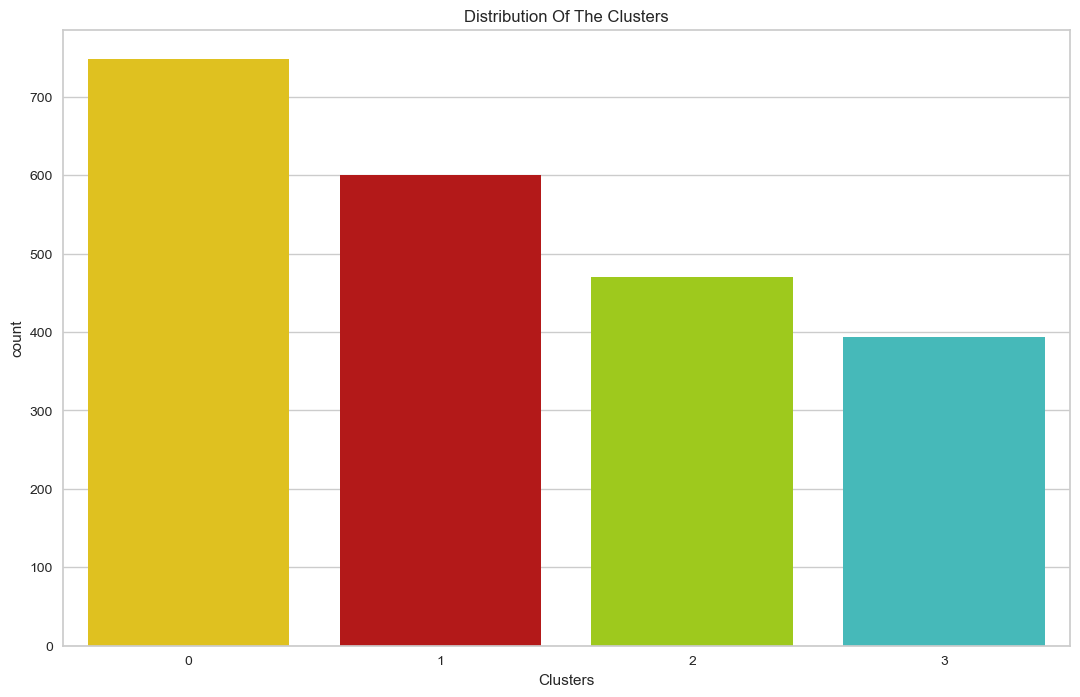

In [78]:


pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()
     


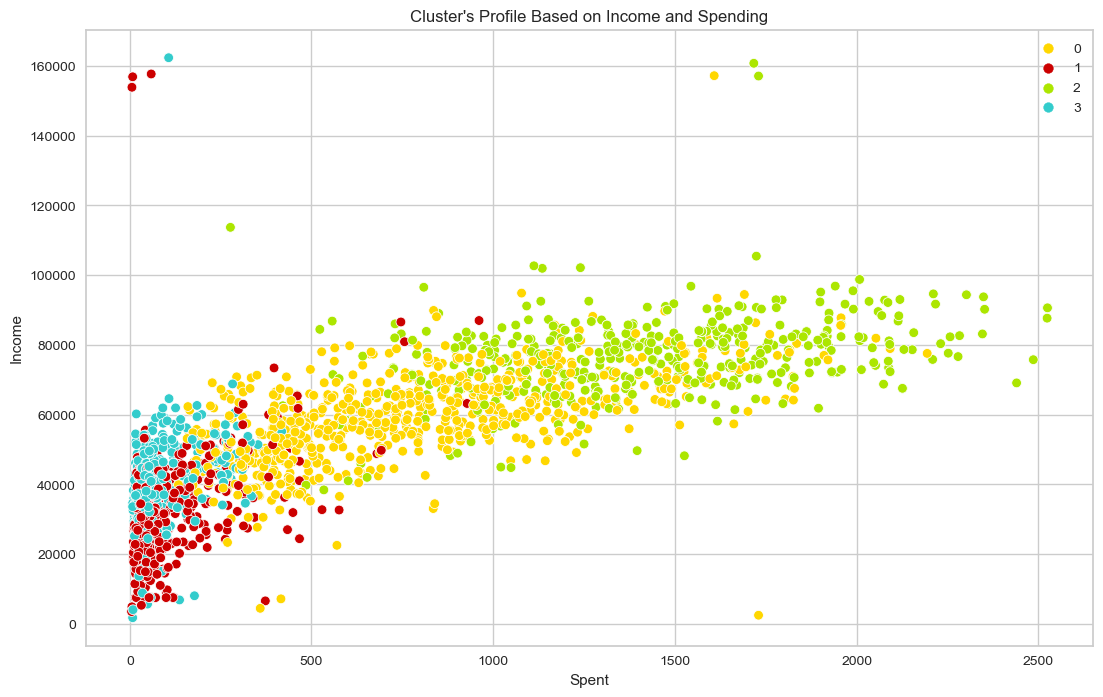

In [79]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=data_old, x=data_old['Spent'], y=data_old['Income'], hue=data_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

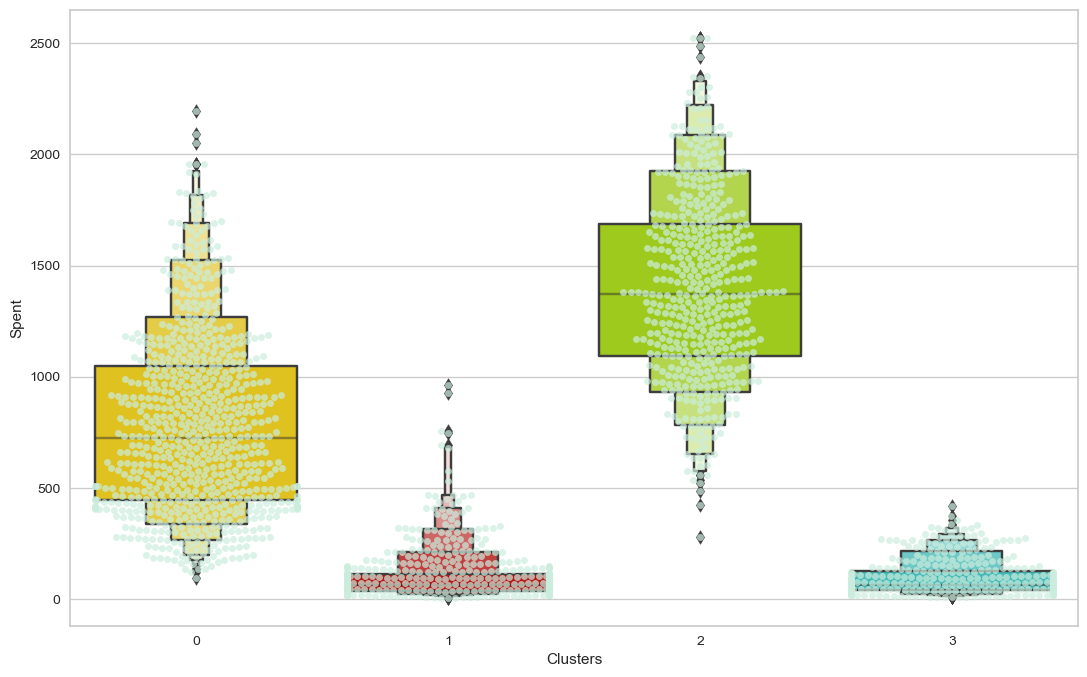

In [80]:

plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=data_old['Clusters'], y=data_old['Spent'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=data_old['Clusters'], y=data_old['Spent'], palette=pal)
plt.show();

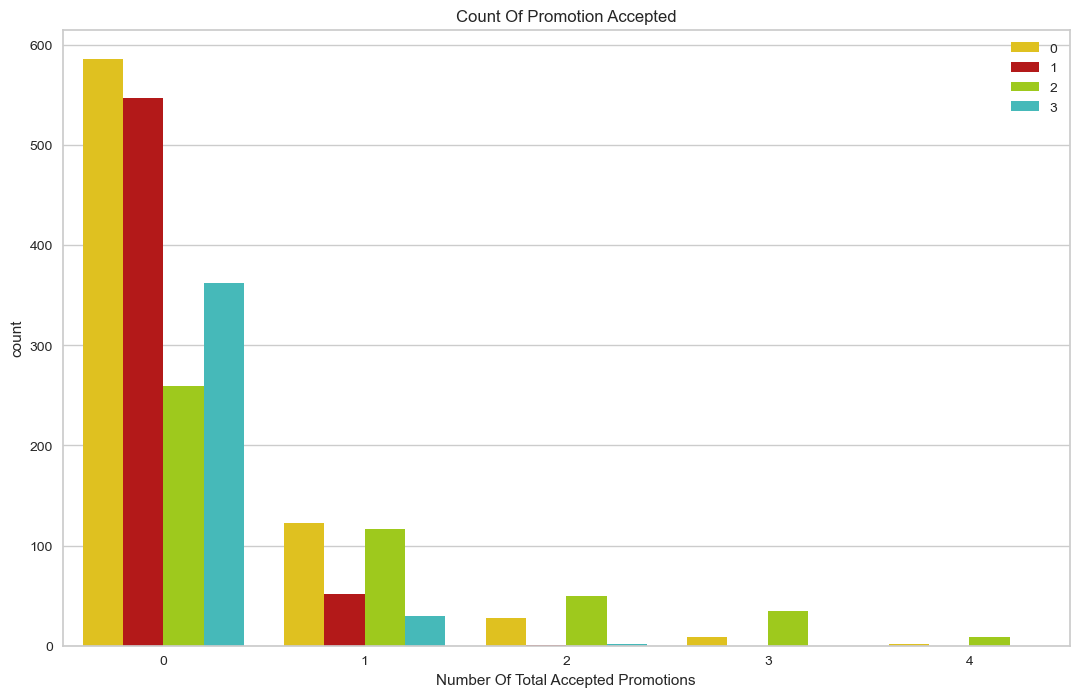

In [81]:

data_old['Total_Promos'] = data_old['AcceptedCmp1']+ data_old['AcceptedCmp2']+ data_old['AcceptedCmp3']+ data_old['AcceptedCmp4']+ data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

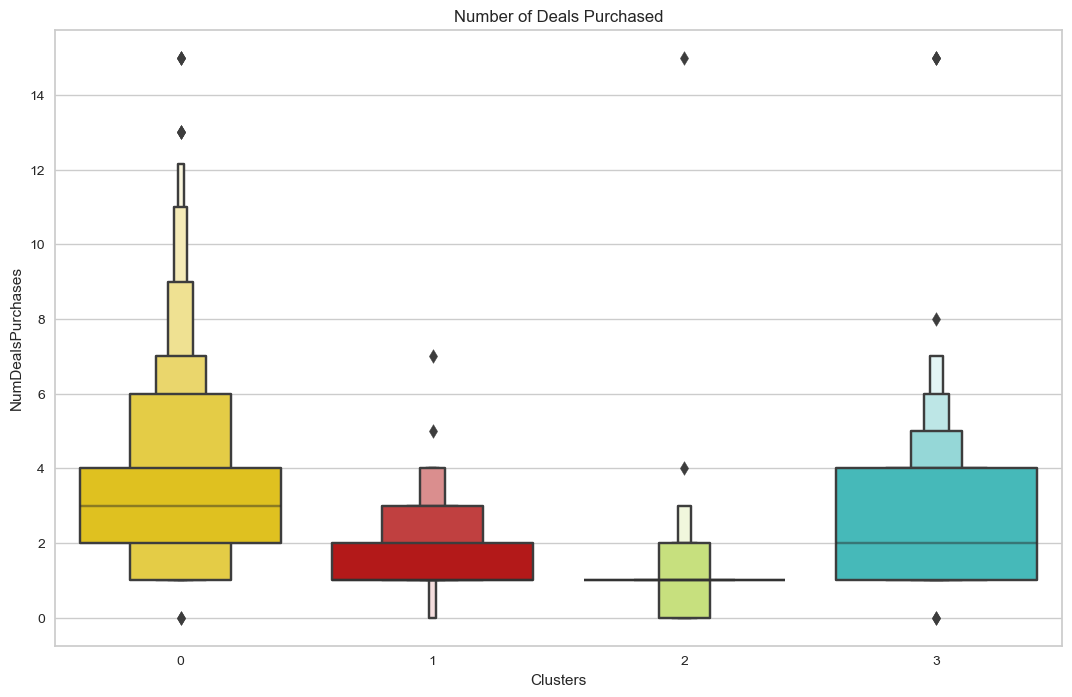

In [82]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=data_old['NumDealsPurchases'],x=data_old['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased');

KeyError: 'Living_With'

<Figure size 1300x800 with 0 Axes>

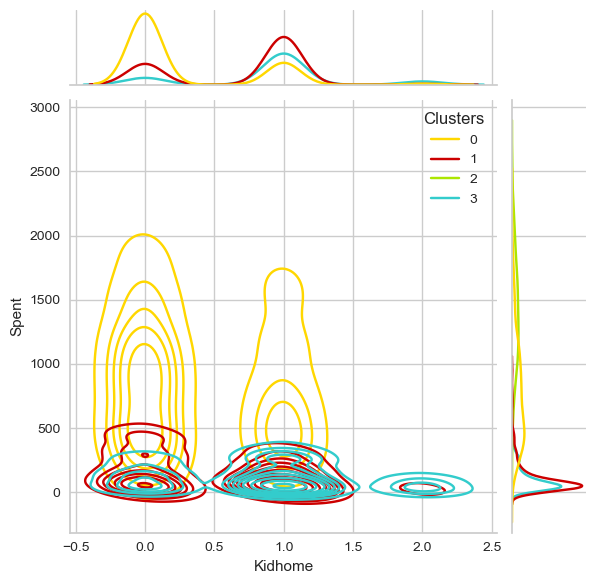

<Figure size 1300x800 with 0 Axes>

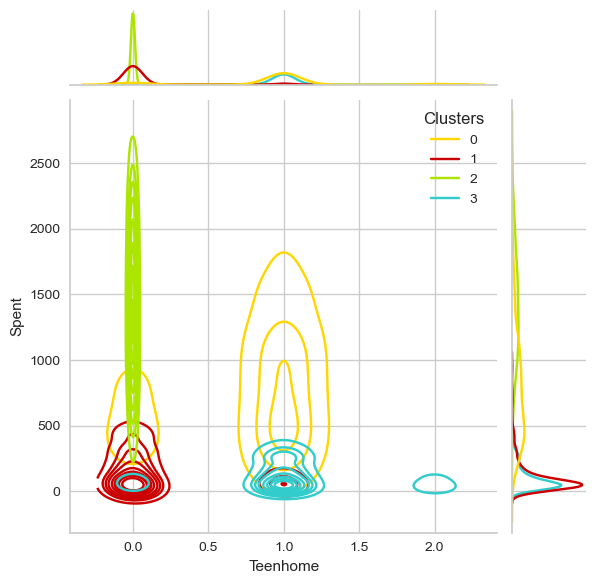

<Figure size 1300x800 with 0 Axes>

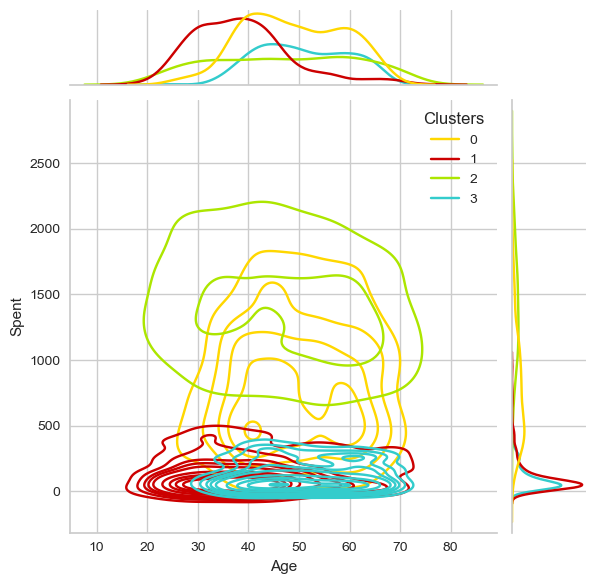

<Figure size 1300x800 with 0 Axes>

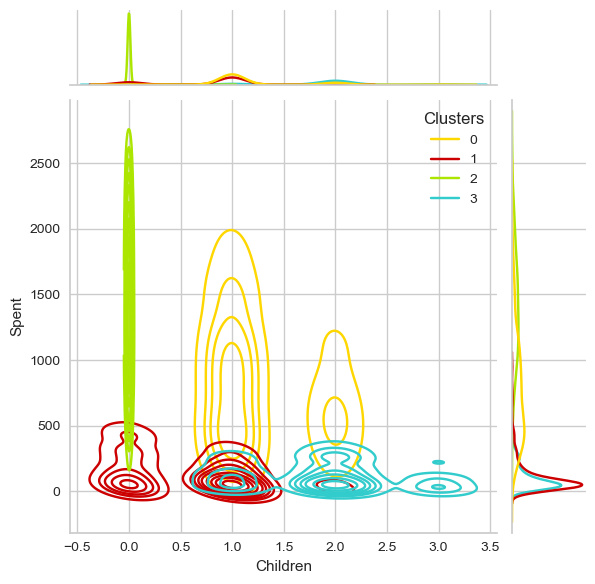

<Figure size 1300x800 with 0 Axes>

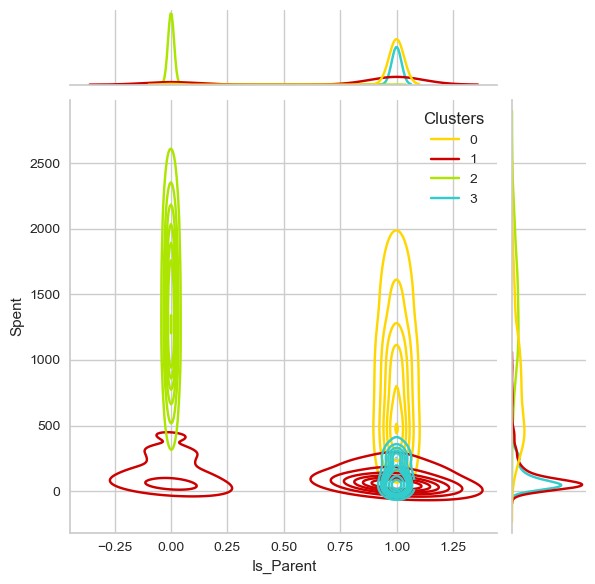

<Figure size 1300x800 with 0 Axes>

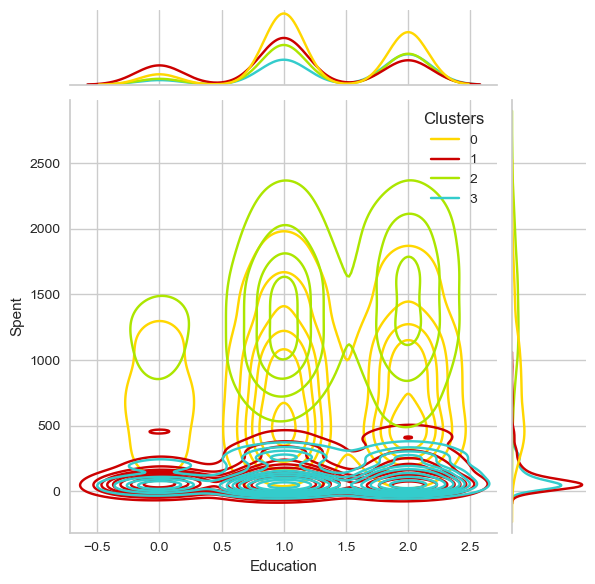

<Figure size 1300x800 with 0 Axes>

In [84]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=data_old[i], y=data_old['Spent'], hue=data_old['Clusters'], kind='kde', palette=pal);